<div class="alert alert-block alert-warning">

# Wichtige Hinweise
**Bitte lesen Sie folgende Hinweise sorgf√§ltig**

- Dies ist das √úbungsblatt. L√∂sen Sie dieses erst, wenn Sie das Beispiels-Blatt (3a) gelesen und gel√∂st haben!
- √ñffen Sie sowohl dieses Blatt wie auch das Beisipels-Blatt nebeneinander, damit Sie sich f√ºr die Aufgaben an den Beispielen orientieren k√∂nnen (falls Sie Hilfe ben√∂tigen, wenden Sie sich an Herrn Wendl).
- Lesen Sie den gesamten Text aufmerksam und vervollst√§ndigen Sie jeden Code-Block in dieser Datei.
</div>

<div class="alert alert-block alert-success">

Viel Erfolg beim L√∂sen der √úbungen! :)
</div>

In [1]:
# ben√∂tigte Bibliotheken importieren
import pandas as pd # pandas f√ºr Datenmanipulation
import matplotlib.pyplot as plt  # matplotlib f√ºr Datenvisualisierung
plt.style.use('ggplot')  # ggplot-Stil f√ºr Diagramme verwenden
import statsmodels.formula.api as smf # statsmodels f√ºr statistische Modelle, insbesondere OLS

# Einfache lineare Regression

In [2]:
# Aufgabe 1: Daten einlesen
# Lesen Sie die CSV-Datei "Data/police_crime.csv" ein und speichern Sie sie in einem DataFrame. Zeigen Sie die ersten 5 Zeilen des DataFrames an.
# IHR CODE HIER
df = pd.read_csv("../Data/police_crime.csv")
df.head()

Polizeistreifen  Straftaten
0                5    5.915402
1                4    4.328751
2                4    3.470240
3                5    5.513267
4                5    5.097078

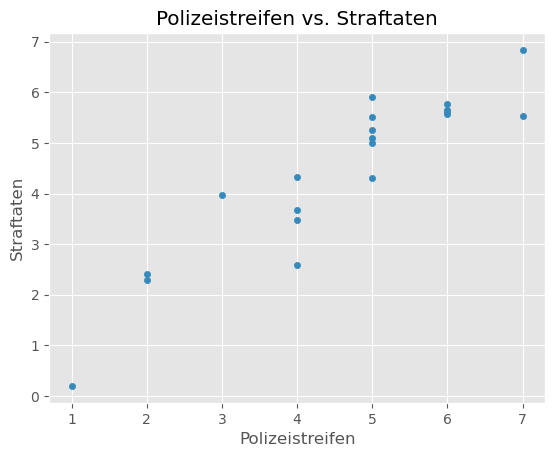

In [3]:
# Aufgabe 2: Zeigen Sie die Polizeistreifen und die Straftaten in einem Streudiagramm an.
df.plot.scatter(x='Polizeistreifen', y='Straftaten', title='Polizeistreifen vs. Straftaten')
plt.xlabel('Polizeistreifen')
plt.ylabel('Straftaten')
plt.show()


Wir wollen hier die Anzahl Polizeistreifen nutzen, um die Anzahl Straftaten vorherzusagen. Welches sind die abh√§ngige und unabh√§ngige Variable in diesen Daten?

**Antwort**:
- *Unabh√§ngige Variable*: Polizeistreifen
- *Abh√§ngige Variable*: Straftaten

Erkennen Sie einen linearen Trend (= eine lineare Tendenz) in diesen Daten?

**Antwort**: Je mehr Polizeistreifen, desto mehr Straftaten. Die Korrelation ist positiv (was jedoch nichts √ºber Kausalit√§t aussagt).

Finden Sie eine optimale Regressionslinie f√ºr die Daten, indem Sie eine lineare Regression mit `statsmodels` durchf√ºhren. Verwenden Sie die Formel `Straftaten ~ Polizeistreifen`, um die Beziehung zwischen der Anzahl der Polizeistreifen und der Anzahl der Straftaten zu modellieren.

In [4]:
# Lineares Regressionsmodell mit statsmodels erstellen
model = smf.ols('Straftaten ~ Polizeistreifen', data=df).fit()
print(model.params)

Intercept          0.277757
Polizeistreifen    0.906982
dtype: float64


Zeichnen Sie ein weiteres Streudiagramm *mit Regressionslinie*

In [5]:
df

Polizeistreifen  Straftaten
0                 5    5.915402
1                 4    4.328751
2                 4    3.470240
3                 5    5.513267
4                 5    5.097078
5                 3    3.968645
6                 5    4.297947
7                 4    3.672338
8                 6    5.607892
9                 7    5.536485
10                2    2.296120
11                5    5.261055
12                5    5.005113
13                6    5.765413
14                4    2.584629
15                6    5.579355
16                6    5.657285
17                1    0.197723
18                7    6.838714
19                2    2.404051

In [ ]:
# Vorhersage der Straftaten als neue Spalte hinzuf√ºgen
df['y_pred'] = model.predict(df['Polizeistreifen'])

<Axes: xlabel='Polizeistreifen', ylabel='Straftaten'>

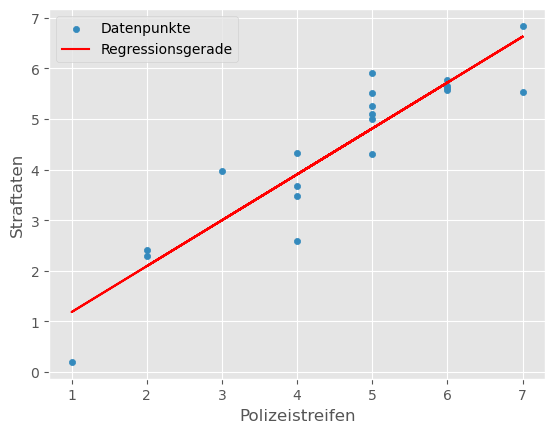

In [11]:
# Datenpunkte als Streudiagramm zeichnen
ax = df.plot.scatter(x="Polizeistreifen", y="Straftaten", label="Datenpunkte")
# Die Regressionsgerade zur bestehenden Achse hinzuf√ºgen
ax = df.plot.line(x='Polizeistreifen', y='y_pred', color='red', label='Regressionsgerade', ax=ax)
ax

Sagen Sie voraus, wie viele Strattaten entdeckt werden bei 6 Polizeikontrollen.

In [12]:
# Vorhersage der Straftaten bei 6 Polizeikontrollen
model.predict(pd.DataFrame({'Polizeistreifen': [6]}))

0    5.71965
dtype: float64

## Aufgabe 2: CO‚ÇÇ-Ausstoss von Autos vorhersagen

Wenn man f√ºr die lineare Regression zwei oder mehr unabh√§ngige Variablen verwendet, spricht man von **multipler linearer Regression**. Bei $n$ verschiedenen unabh√§ngigen Varialben $x_1, x_2, \ldots, x_n$ wird zur Modellierung eine lineare Funktion vom Typ $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$ verwendet. Statt einer Geraden repr√§sentiert sie eine *Ebene* in einem mehrdimensioanlen Raum (=Hyperebene).

F√ºr diese Aufgabe analysieren wir den Datensatz √ºber [Autos und CO‚ÇÇ-Ausstoss von W3Schools](https://www.w3schools.com/python/python_ml_multiple_regression.asp).Der Datensatz `Data/cars-co2.csv` enth√§lt Informationen √ºber verschiedene Autos, darunter den CO‚ÇÇ-Ausstoss (in g/km) und verschiedene Merkmale wie Markennamen, Gewicht und Volumen. Ziel ist es, den CO‚ÇÇ-Ausstoss anhand dieser Merkmale vorherzusagen. √úber die unabh√§ngigen Variablen `Weight` (=Gewicht) und `Volume` (=Volume) soll also der CO‚ÇÇ-Ausstoss `CO2` (abh√§ngige Variable) vorhergesagt werden.



**a)** Laden Sie den Datensatz `Data/cars-co2.csv` in einen DataFrame und zeigen Sie die ersten 5 Zeilen an.`

In [13]:
cars_df = pd.read_csv("../Data/cars-co2.csv")
cars_df.head()

Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105

**b)** √ºberpr√ºfen Sie f√ºr jede unabh√§ngige Variable separat, ob sie in einem linearen Zusammenhang zur abh√§ngigen Variable `CO2` steht, indem Sie f√ºr jede unabh√§ngige Variable ein Streudiagramm erstellen.

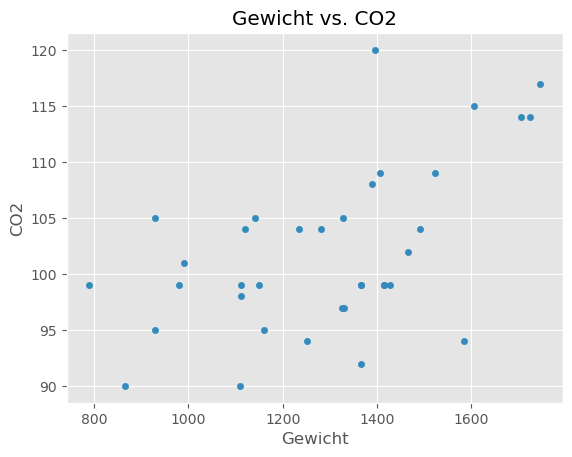

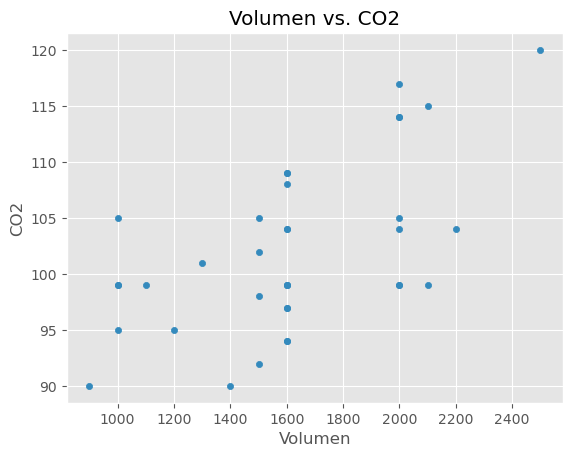

In [14]:
# Streudiagramm f√ºr Gewicht vs. CO2
cars_df.plot.scatter(x='Weight', y='CO2', title='Gewicht vs. CO2')
plt.xlabel('Gewicht')
plt.ylabel('CO2')
plt.show()

# Streudiagramm f√ºr Volumen vs. CO2
cars_df.plot.scatter(x='Volume', y='CO2', title='Volumen vs. CO2')
plt.xlabel('Volumen')
plt.ylabel('CO2')
plt.show()

Erstellen Sie mit Hilfe von statsmodels ein lineares Modell. Gibt es mehr als eine unabh√§ngige Variable, werden sie im Schl√ºssel-Argument `formula` von `ols()` mit `+` verbunden, also z.B. `'CO2 ~ weight + volume'`.

In [15]:
# Lineares Regressionsmodell mit zwei unabh√§ngigen Variablen (Weight und Volume) erstellen
co2_model = smf.ols('CO2 ~ Weight + Volume', data=cars_df).fit()
print(co2_model.params)

Intercept    79.694719
Weight        0.007551
Volume        0.007805
dtype: float64


Welche Parameter findet das Modell?

**Antwort**: 3 Parameter (Achsenabschnitt $a_0$ (`Intercept`) sowie $a_1$ (`Weight`) und $a_2$ (`Volume`))

Wie viel CO2 wird bei einem Gewicht von 2000 und einem Volumen von 1000 emittiert?


In [16]:
# Vorhersage des CO2-Aussto√ües bei Gewicht=2000 und Volumen=1000
gewicht = 2000
volumen = 1000
co2_vorhersage = co2_model.params['Intercept'] + co2_model.params['Weight'] * gewicht + co2_model.params['Volume'] * volumen
print(f"Vorhergesagter CO2-Aussto√ü bei Gewicht={gewicht} und Volumen={volumen}: {co2_vorhersage:.2f}")

Vorhergesagter CO2-Aussto√ü bei Gewicht=2000 und Volumen=1000: 102.60


<div class="alert alert-block alert-info">
<strong>Kontrollfragen</strong>

1. Was versteht man unter der *abh√§ngigen* Variablen? 
2. Was versteht man unter *unabh√§ngigen* Variablen?
3. Was ist der Unterschied zwischen der *einfachen* linearen Regression und der *multiplen* linearen Regression?
4. Weshalb muss man die *Linearit√§t* der unabh√§ngigen Variablen √ºberpr√ºfen? Und wie macht man das?
5. Wozu verwendet man die Programmbibliothek *pandas*?
6. Wozu verwendet man die Programmbibliothek *statsmodels*?
7. Was versteht man unter einem statistischen Modell?
</div>

<div class="alert alert-block alert-warning">
<strong>üèÜ Challenge-Aufgabe: Weitere Modelle</strong>

Manchmal stehen Daten auch nicht in einem linearen Zusammenhang, sondern sind beispielsweise polynomisch verteilt, wie z.B. hier:

<div style="display: flex; flex-direction: column; width:60%; margin-left: 20%; margin-right: 20%;">

![Polynomial Regression](../Images/polynomial_regression.png)
</div>


Schauen Sie sich dazu dieses [Tutorial](https://www.w3schools.com/python/python_ml_polynomial_regression.asp) an und erstellen Sie selber eine polynomiale Regression, indem Sie den Code in den Zellen untenan einf√ºgen.
</div>

In [ ]:
#¬†IHR CODE HIER

<div class="alert alert-block alert-warning">
<strong>üèÜ Challenge-Aufgabe: Jupyter Notebook</strong>

Lernen Sie, wie man effizient mit Jupyter Notebooks arbeitet. Schauen Sie sich herzu die Dokumentation zu den Shortcuts an: [Jupyter Notebook Shortcuts](https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330/).

</div>